# <span style = 'color: red'>**Análisis descriptivo.** Mortalidad por tuberculosis en Colombia

## ***Simón Cuartas Rendón***
***Estudiante de Maestría en Ingeniería - Analítica***

Facultad de Minas
Universidad Nacional de Colombia Sede Medellín 

En este *notebook* se presenta el **análisis descriptivo** para las series de tiempo asociadas con los datos de mortalidad por tuberculosis en Colombia. En ese sentido, se abordará el análisis de tres series de tiempo:

- Defunciones por tuberculosis en Colombia, $D(x, \ t)$.
- Población expuesta a la tuberculosis en Colombia, $N(x, \ t)$.
- Tasa de mortalidad por cada 100 mil habitantes en Colombia, $\mathbf{m}(x, \ t)$.

La tesis se centra en el estudio de modelos estocásticos y de aprendizaje de máquina que permiten pronósticos sobre la tercera serie listada; no obstante, las dos anteriores son relevantes ya que estos valores se pueden obtener a partir de los dos anteriores, así:

$$
\mathbf{m}(x, \ t) = \frac{D(x, \ t)}{N(x, \ t)}
$$

En estas expresiones, $x$ y $t$ son índices para los grupos etarios y el período. En particular, se tiene que $x = 1, \ 2, \ \dots, 17$ y $t = 1, \ 2, \ \dots, 45$, donde $t=1$ se asocia con el año 1979 y $t=47$ es el año 2023.

In [1]:
# Paquetes para manipulación de datos
import pandas as pd
import numpy as np
import os

# Paquetes para visualización de datos
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import animation
import seaborn as sns

# Paquetes para manipulación de fechas
from datetime import datetime, timedelta

In [2]:
import sys, os

# Intento robusto para añadir la carpeta "src" del proyecto al PYTHONPATH
for candidate in ("src", "../src", "../../src"):
    p = os.path.abspath(candidate)
    if os.path.isdir(p) and p not in sys.path:
        sys.path.append(p)

# Si ya estaba importado, recargar para tomar cambios del módulo
try:
    import importlib
    import viz.style as _vstyle
    importlib.reload(_vstyle)
except Exception:
    pass

from viz.style import get_palette, apply_matplotlib_style

In [3]:
# Aplica estilo global: fuente (Ancizar si está disponible) y ciclo de colores
applied_family = apply_matplotlib_style(
    n_colors=7,
    base_font_size=11,
    seaborn_style="white",
    background="white",
    transparent=False,
)

# Diagnóstico rápido de fondo
import matplotlib as mpl
print(f"Fuente aplicada: {applied_family}")
print("figure.facecolor:", mpl.rcParams["figure.facecolor"]) 
print("axes.facecolor:", mpl.rcParams["axes.facecolor"]) 
print("savefig.transparent:", mpl.rcParams["savefig.transparent"]) 
print("savefig.facecolor:", mpl.rcParams["savefig.facecolor"])

Fuente aplicada: Ancizar Serif
figure.facecolor: white
axes.facecolor: white
savefig.transparent: False
savefig.facecolor: white


# <span style = 'color: red'>***1.*** Análisis de la serie de defunciones

Se comenzará con el análisis de las series de mortalidad por tuberculosis en Colombia. Para ello, se realizará inicialmente una evaluación de la serie agregada únicamente por año y, a continuación, se revisará su comportamiento considerando también el grupo etario.

In [4]:
# Lectura de datos
defunc = pd.read_csv(
    r'../data/processed/defunc/defunciones_por_gr_et_sin_sexo.csv'
)

print(
    f'La base contiene {defunc.shape[0]} registros y {defunc.shape[1]} columnas.'
)

La base contiene 765 registros y 3 columnas.


In [5]:
defunc.dtypes

ano                   int64
gr_et                 int64
conteo_defunciones    int64
dtype: object

In [6]:
defunc.head(3)

,ano,gr_et,conteo_defunciones
0,1979,1,175
1,1979,2,41
2,1979,3,31


In [ ]:
# 
# Etiquetas para el grupo etario
etiquetas_gr = {
    1:"0–4", 2:"5–9", 3:"10–14", 4:"15–19", 5:"20–24", 6:"25–29",
    7:"30–34", 8:"35–39", 9:"40–44", 10:"45–49", 11:"50–54", 12:"55–59",
    13:"60–64", 14:"65–69", 15:"70–74", 16:"75–79", 17:"≥80", 
}

defunc['grupo_etario'] = defunc['gr_et'].map(etiquetas_gr)
defunc['periodo'] = defunc['ano'] - np.min(defunc['ano']) + 1

defunc.head(3)

,ano,gr_et,conteo_defunciones,grupo_etario,periodo
0,1979,1,175,0–4,1
1,1979,2,41,5–9,1
2,1979,3,31,10–14,1


## <span style = 'color: green'> ***1.1.***</span> Serie por período

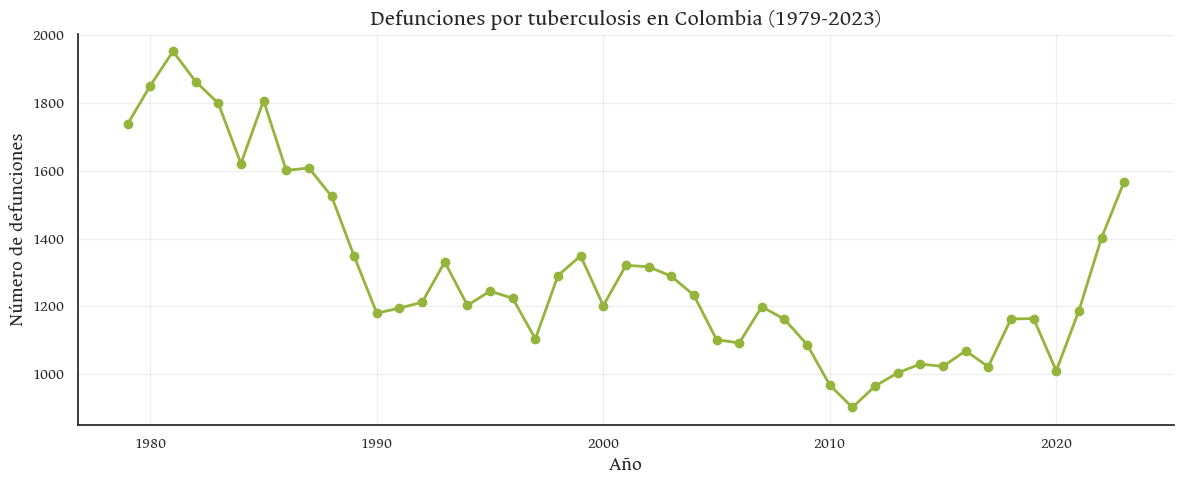

In [8]:
# Base agregada por período
defunc_per = defunc.groupby(
    ['ano'], as_index = True)[
        'conteo_defunciones'
    ].sum().reset_index()

# Obtener un color de la paleta (como lista de un solo color)
color = get_palette(1)[0]

plt.figure(figsize=(12,5))
plt.plot(
    defunc_per['ano'], defunc_per['conteo_defunciones'],
    marker='o', color=color, linewidth=2,
)
plt.title(
    'Defunciones por tuberculosis en Colombia (1979-2023)',
    fontsize=16,
    # fontweight='bold',
)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Número de defunciones', fontsize=14)

# Mostrar solo marco inferior e izquierdo
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(
    '../figuras/descriptivo/descr_defunc_ano.png',
    dpi=300,
    bbox_inches='tight',
)
plt.show()

## <span style = 'color: green'> ***1.2.***</span> Serie por grupo etario

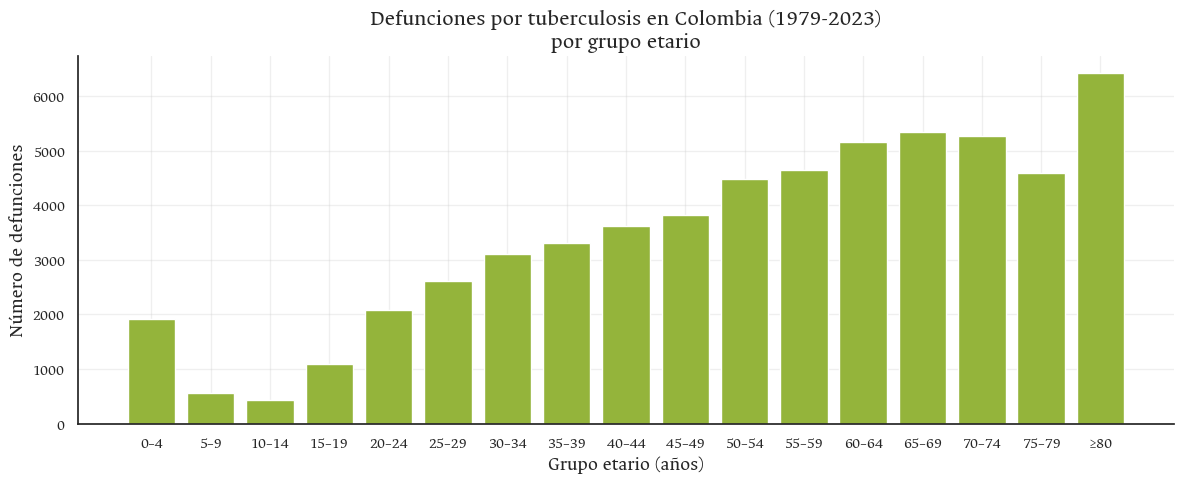

In [9]:
# Base agregada por grupo etario
defunc_gr_et = defunc.groupby(
    ['gr_et'], as_index = True)[
        'conteo_defunciones'
    ].sum().sort_index()

color = get_palette(1)[0]

plt.figure(figsize=(12,5))
plt.bar(
    defunc_gr_et.index.map(etiquetas_gr),
    defunc_gr_et.values,
    color=color,
)
plt.title(
    'Defunciones por tuberculosis en Colombia (1979-2023)\npor grupo etario',
    fontsize=16,
    # fontweight='bold',
)
plt.xlabel('Grupo etario (años)', fontsize=14)
plt.ylabel('Número de defunciones', fontsize=14)
# Mostrar solo marco inferior e izquierdo
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(
    '../figuras/descriptivo/descr_defunc_grupo_etario.png',
    dpi=300,
    bbox_inches='tight',
)
plt.show()

## <span style = 'color: green'>***1.3.***</span> Mapa de calor

In [10]:
defunc_pivot = (
    defunc
    .pivot_table(
        index='grupo_etario',
        columns='ano',
        values='conteo_defunciones',
        aggfunc='sum',
        fill_value=0
    )
)

# Asegurar orden consistente de filas según el diccionario etiquetas_gr
orden_filas = [etiquetas_gr[i] for i in sorted(etiquetas_gr.keys())]
defunc_pivot = defunc_pivot.reindex(orden_filas)

# Ordenar columnas (años) ascendentemente por claridad visual
defunc_pivot = defunc_pivot[sorted(defunc_pivot.columns)]

# Vista rápida
defunc_pivot.iloc[:5, :8]  # primeras 5 filas y 8 columnas para inspección

ano,1979,1980,1981,1982,1983,1984,1985,1986
grupo_etario,,,,,,,,
0–4,175,154,163,148,106,85,94,72
5–9,41,38,44,35,22,33,33,25
10–14,31,19,35,29,20,22,14,16
15–19,48,43,56,45,41,46,51,28
20–24,90,106,90,92,80,80,60,59


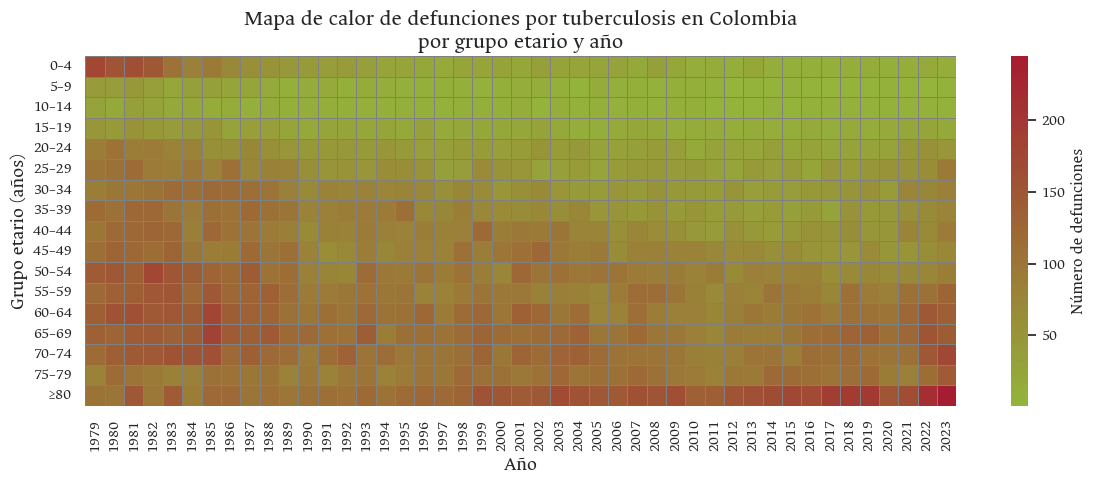

In [11]:
from matplotlib.colors import LinearSegmentedColormap

# Tomar el color definido
color = get_palette(2)

# Crear un colormap que va de blanco → color
cmap = LinearSegmentedColormap.from_list("mi_cmap", [color[0], color[1]])

plt.figure(figsize=(12,5))
sns.heatmap(
    defunc_pivot,
    cmap=cmap,
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Número de defunciones'},
)
plt.title(
    'Mapa de calor de defunciones por tuberculosis en Colombia\npor grupo etario y año',
    fontsize=16,
)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Grupo etario (años)', fontsize=14)
plt.tight_layout()
plt.savefig(
    '../figuras/descriptivo/descr_defunc_heatmap_ano_gret.png',
    dpi=300,
    bbox_inches='tight',
)
plt.show()


In [12]:
get_palette(2)[0]

(0.5803921568627451, 0.7058823529411765, 0.23137254901960785)

## <span style = 'color: green'>***1.4.***</span> Grupo etario modal por año

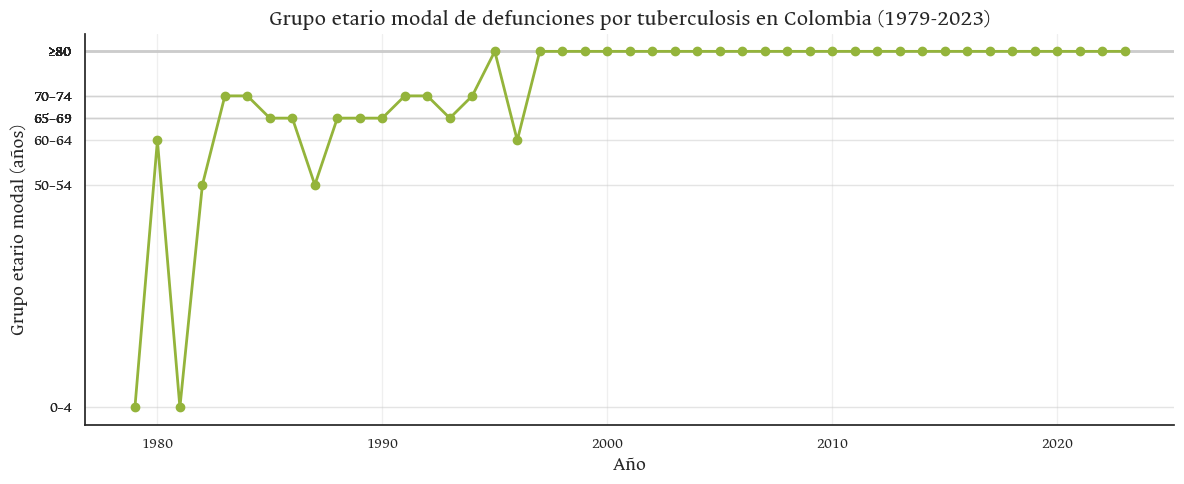

In [13]:
# Gráfica del grupo etario modal por año
defunc_modal = defunc.loc[
    defunc.groupby('ano')['conteo_defunciones'].idxmax()
].sort_values('ano')

plt.figure(figsize=(12,5))
plt.plot(
    defunc_modal['ano'], defunc_modal['gr_et'],
    marker='o', color=get_palette(1)[0], linewidth=2,
)
plt.yticks(
    ticks=defunc_modal['gr_et'],
    labels=defunc_modal['grupo_etario'],
)
plt.title(
    'Grupo etario modal de defunciones por tuberculosis en Colombia (1979-2023)',
    fontsize=16,
)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Grupo etario modal (años)', fontsize=14)
# Mostrar solo marco inferior e izquierdo
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(
    '../figuras/descriptivo/descr_defunc_grupo_etario_modal_ano.png',
    dpi=300,
    bbox_inches='tight',
)
plt.show()

## <span style = 'color: green'>***1.5.***</span> Cociente $n$ de defunciones



In [14]:
def cociente_mayor_n(df, n):
    """Cociente (defunciones con edad_mid > n) / (defunciones con edad_mid <= n) por año."""
    edades = {
        1:2, 2:7, 3:12, 4:17, 5:22, 6:27, 7:32, 8:37, 9:42, 10:47,
        11:52, 12:57, 13:62, 14:67, 15:72, 16:77, 17:85
    }
    df["edad_mid"] = df["gr_et"].map(edades)
    
    coc = {}
    for year, d in df.groupby("ano"):
        mayores = d.loc[d["edad_mid"]>n, "conteo_defunciones"].sum()
        menores = d.loc[d["edad_mid"]<=n, "conteo_defunciones"].sum()
        coc[year] = mayores / menores if menores > 0 else None
    return pd.Series(coc, name=f"> {n}")

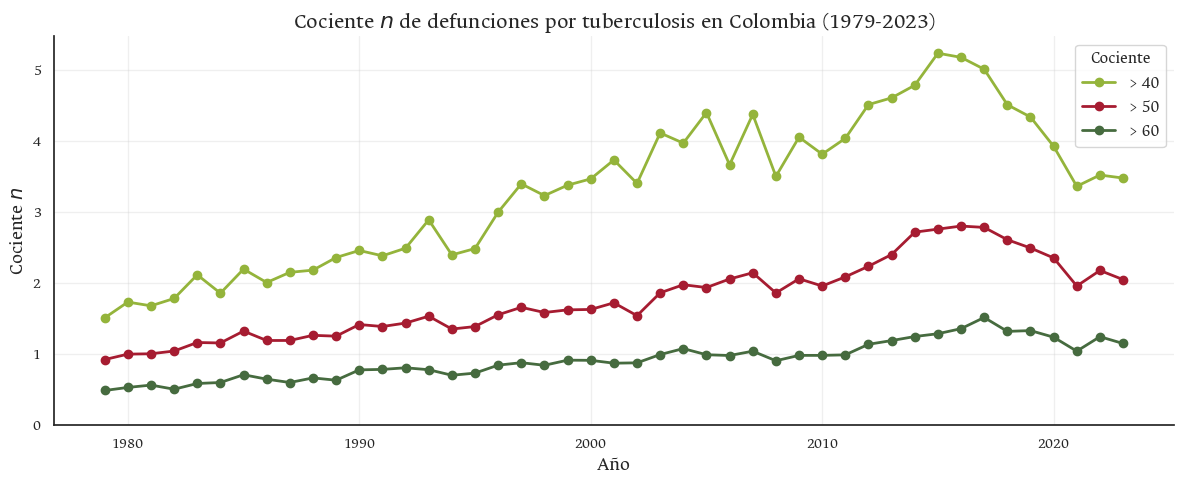

In [15]:
# Cálculo de cocientes
c40 = cociente_mayor_n(defunc, 40)
c50 = cociente_mayor_n(defunc, 50)
c60 = cociente_mayor_n(defunc, 60)

cocientes = pd.concat([c40, c50, c60], axis=1)

# Gráfico de series de cocientes
color = get_palette(3)
plt.figure(figsize=(12,5))
for col, c in zip(cocientes.columns, color):
    plt.plot(
        cocientes.index, cocientes[col],
        marker='o', color=c, linewidth=2, label=col
    )
plt.title(
    'Cociente $n$ de defunciones por tuberculosis en Colombia (1979-2023)',
    fontsize=16,
    # fontweight='bold',
)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Cociente $n$', fontsize=14)
plt.legend(title='Cociente', fontsize=12)
# Mostrar solo marco inferior e izquierdo
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(True, alpha=0.3)
plt.ylim(bottom=0)
plt.tight_layout()
plt.savefig(
    '../figuras/descriptivo/descr_defunc_cocientes_ano.png',
    dpi=300,
    bbox_inches='tight',
)
plt.show()

## <span style = 'color: green'>***1.6.***</span> Proporción de defunciones

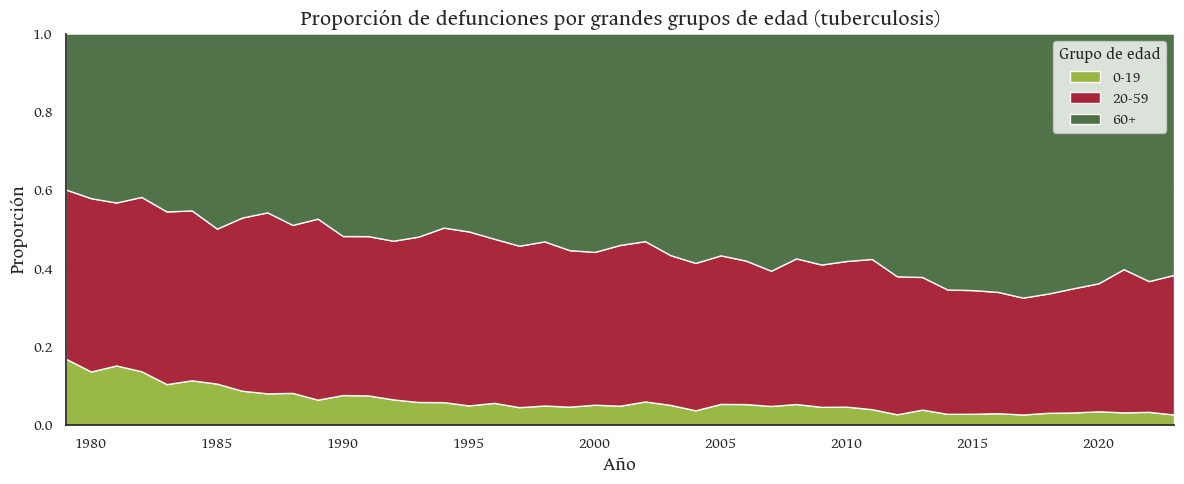

grupo_grande,0-19,20-59,60+
ano,,,
1979,0.169735,0.432106,0.398159
1980,0.137223,0.442464,0.420313
1981,0.152664,0.415984,0.431352
1982,0.137950,0.444981,0.417069
1983,0.105058,0.440800,0.454141


In [16]:
# Proporción de defunciones por grandes grupos de edad (0-14, 15-59, 60+)
# Nota: En tu mensaje original pusiste 15-69 y >60; aquí usamos 15-59 y 60+ (sin solapamiento).

# Definir mapeo de gr_et a grandes grupos
map_grande = {
    **{k: '0-19' for k in [1,2,3,4,]},                 # 0–4, ..., 15-19
    **{k: '20-59' for k in [5,6,7,8,9,10,11,]},        # 20-24, ... 55–59
    **{k: '60+'   for k in [12,13,14,15,16,17]},        # 60–64 ... ≥80
}

# Crear columna de gran grupo (solo si no existe)
if 'grupo_grande' not in defunc.columns:
    defunc['grupo_grande'] = defunc['gr_et'].map(map_grande)

# Agregar defunciones por año y gran grupo
defunc_grandes = (
    defunc
    .groupby(['ano','grupo_grande'], as_index=False)['conteo_defunciones']
    .sum()
)

# Pivot para obtener matriz años x grupos
defunc_grandes_pivot = defunc_grandes.pivot(
    index='ano', columns='grupo_grande', values='conteo_defunciones'
).fillna(0)

# Asegurar columnas en el orden deseado
for col in ['0-19','20-59','60+']:
    if col not in defunc_grandes_pivot.columns:
        defunc_grandes_pivot[col] = 0

defunc_grandes_pivot = defunc_grandes_pivot[['0-19','20-59','60+']]

# Calcular proporciones fila a fila
proporciones = defunc_grandes_pivot.div(defunc_grandes_pivot.sum(axis=1), axis=0)

# USAR exactamente la paleta solicitada
color = get_palette(3)  # devuelve una lista de 3 colores
color_0_14, color_15_59, color_60p = color  # asignación en orden

plt.figure(figsize=(12,5))
plt.stackplot(
    proporciones.index,
    proporciones['0-19'],
    proporciones['20-59'],
    proporciones['60+'],
    colors=[color_0_14, color_15_59, color_60p],
    labels=['0-19','20-59','60+'],
    alpha=0.95
)

plt.title('Proporción de defunciones por grandes grupos de edad (tuberculosis)', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Proporción', fontsize=14)
plt.ylim(0,1)
plt.xlim(proporciones.index.min(), proporciones.index.max())
plt.legend(title='Grupo de edad', loc='upper right')

# Estética consistente con gráficos previos
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(True, axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('../figuras/descriptivo/descr_defunc_proporcion_grupos.png', dpi=300, bbox_inches='tight')
plt.show()

# Mostrar primeras filas de la tabla de proporciones como verificación
proporciones.head()

In [17]:
required_cols = {'ano','gr_et','conteo_defunciones'}
missing = required_cols - set(defunc.columns)
if missing:
    raise ValueError(f'Faltan columnas requeridas en defunc: {missing}')

# Copia de trabajo para no mutar el objeto original si se re-ejecuta
df = defunc.copy()

# 1. Diccionarios y columnas auxiliares
if 'etiquetas_gr' not in globals():
    etiquetas_gr = {
        1:"0–4", 2:"5–9", 3:"10–14", 4:"15–19", 5:"20–24", 6:"25–29",
        7:"30–34", 8:"35–39", 9:"40–44", 10:"45–49", 11:"50–54", 12:"55–59",
        13:"60–64", 14:"65–69", 15:"70–74", 16:"75–79", 17:"≥80"
    }

# Edad media aproximada (midpoints)
edades = {1:2, 2:7, 3:12, 4:17, 5:22, 6:27, 7:32, 8:37, 9:42, 10:47,
          11:52, 12:57, 13:62, 14:67, 15:72, 16:77, 17:85}
if 'edad_mid' not in df.columns:
    df['edad_mid'] = df['gr_et'].map(edades)
else:
    # Asegurar consistencia si existe
    if df['edad_mid'].isna().any():
        df['edad_mid'] = df['gr_et'].map(edades)

def grupo_amplio(g):
    if g <= 3:      # 0–14
        return '0-14'
    elif g <= 12:   # 15–59
        return '15-59'
    else:           # ≥60
        return '60+'
if 'grupo_amplio' not in df.columns:
    df['grupo_amplio'] = df['gr_et'].apply(grupo_amplio)

# 2. Utilidades ponderadas
def wmean(x, w):
    x = np.asarray(x, dtype=float); w = np.asarray(w, dtype=float)
    return np.sum(w * x) / np.sum(w) if np.sum(w) > 0 else np.nan

def wvar(x, w):
    x = np.asarray(x, dtype=float); w = np.asarray(w, dtype=float)
    W = np.sum(w)
    if W <= 1: return np.nan
    mu = np.sum(w*x)/W
    denom = (W**2 - np.sum(w**2))
    f = W**2/denom if denom > 0 else 1.0  # Kish
    return f * np.sum(w*(x-mu)**2) / W

def wstd(x, w):
    v = wvar(x, w)
    return np.sqrt(v) if pd.notnull(v) else np.nan

def wmedian(x, w):
    dfm = pd.DataFrame({'x':x, 'w':w}).sort_values('x')
    if dfm.empty: return np.nan
    c = dfm['w'].cumsum()
    cutoff = dfm['w'].sum()/2
    return float(dfm.loc[c >= cutoff, 'x'].iloc[0])

# 3. Agregaciones básicas
year_tot = df.groupby('ano')['conteo_defunciones'].sum().sort_index()
age_tot  = df.groupby('gr_et')['conteo_defunciones'].sum().sort_index()
first_year, last_year = int(year_tot.index.min()), int(year_tot.index.max())

tot_60p = df.loc[df['edad_mid']>=60, 'conteo_defunciones'].sum()
tot_u60 = df.loc[df['edad_mid']<60,  'conteo_defunciones'].sum()
tot_014 = df.loc[df['grupo_amplio']=='0-14','conteo_defunciones'].sum()
tot_1559= df.loc[df['grupo_amplio']=='15-59','conteo_defunciones'].sum()

def cohort_share_ratio(tmp):
    total = tmp['conteo_defunciones'].sum()
    if total == 0:
        return pd.Series({'prop_0_14':np.nan,'prop_15_59':np.nan,'prop_60+':np.nan,'razon_60_vs_<60':np.nan})
    s014  = tmp.loc[tmp['grupo_amplio']=='0-14','conteo_defunciones'].sum()/total
    s1559 = tmp.loc[tmp['grupo_amplio']=='15-59','conteo_defunciones'].sum()/total
    s60p  = tmp.loc[tmp['grupo_amplio']=='60+','conteo_defunciones'].sum()/total
    base_no60 = tmp.loc[tmp['grupo_amplio']!='60+','conteo_defunciones'].sum()
    r60   = (tmp.loc[tmp['grupo_amplio']=='60+','conteo_defunciones'].sum()/base_no60) if base_no60>0 else np.nan
    return pd.Series({'prop_0_14':s014,'prop_15_59':s1559,'prop_60+':s60p,'razon_60_vs_<60':r60})

by_year_props = df.groupby('ano').apply(cohort_share_ratio)

age_mean_global   = wmean(df['edad_mid'], df['conteo_defunciones'])
age_median_global = wmedian(df['edad_mid'], df['conteo_defunciones'])
age_sd_global     = wstd(df['edad_mid'], df['conteo_defunciones'])

modal_global_gr = int(age_tot.idxmax())
modal_global_lb = etiquetas_gr.get(modal_global_gr, str(modal_global_gr))

# 4. Resumen global
resumen_global = pd.DataFrame({
    'Indicador':[
        'Total de defunciones (todo el período)',
        'Promedio anual de defunciones',
        'Desviación estándar anual',
        'Año con mínimo (defunciones)',
        'Año con máximo (defunciones)',
        'Proporción global 0–14',
        'Proporción global 15–59',
        'Proporción global ≥60',
        'Razón ≥60 / <60 (global)',
        'Edad media de defunción (ponderada)',
        'Edad mediana de defunción (ponderada)',
        'DE de la edad de defunción (ponderada)',
        'Grupo etario modal global (código)',
        'Grupo etario modal global (etiqueta)'
    ],
    'Valor':[
        int(year_tot.sum()),
        float(year_tot.mean()),
        float(year_tot.std(ddof=1)),
        f"{int(year_tot.idxmin())} ({int(year_tot.min())})",
        f"{int(year_tot.idxmax())} ({int(year_tot.max())})",
        tot_014 / (tot_014 + tot_1559 + tot_60p),
        tot_1559/ (tot_014 + tot_1559 + tot_60p),
        tot_60p / (tot_014 + tot_1559 + tot_60p),
        tot_60p / (tot_014 + tot_1559) if (tot_014 + tot_1559)>0 else np.nan,
        age_mean_global,
        age_median_global,
        age_sd_global,
        modal_global_gr,
        modal_global_lb
    ]
})

# Redondeo para presentación en proporciones/números continuos
mask_num = resumen_global['Indicador'].str.contains('Proporción|Razón|Edad')
resumen_global.loc[mask_num,'Valor'] = resumen_global.loc[mask_num,'Valor'].apply(lambda x: round(x,4) if isinstance(x,(int,float)) else x)

# 5. Resumen por décadas
df_dec = df.copy()
df_dec['decada'] = (df_dec['ano']//10)*10
def resumen_decada(g):
    total = g['conteo_defunciones'].sum()
    prop_60 = g.loc[g['edad_mid']>=60,'conteo_defunciones'].sum()/total if total>0 else np.nan
    med_age = wmedian(g['edad_mid'], g['conteo_defunciones'])
    return pd.Series({'defunciones_total':int(total),
                      'prop_>=60':prop_60,
                      'edad_mediana':med_age})
resumen_decadas = df_dec.groupby('decada').apply(resumen_decada).reset_index()
resumen_decadas['prop_>=60'] = resumen_decadas['prop_>=60'].round(4)

# 6. Comparación primer vs último año
comp_anios = pd.DataFrame({
    'Año':[first_year, last_year],
    'Defunciones_totales':[int(year_tot.loc[first_year]), int(year_tot.loc[last_year])],
    'Prop_0_14':[by_year_props.loc[first_year,'prop_0_14'], by_year_props.loc[last_year,'prop_0_14']],
    'Prop_15_59':[by_year_props.loc[first_year,'prop_15_59'], by_year_props.loc[last_year,'prop_15_59']],
    'Prop_60+':[by_year_props.loc[first_year,'prop_60+'], by_year_props.loc[last_year,'prop_60+']],
    'Razon_60_vs_<60':[by_year_props.loc[first_year,'razon_60_vs_<60'], by_year_props.loc[last_year,'razon_60_vs_<60']]
})
comp_anios[['Prop_0_14','Prop_15_59','Prop_60+','Razon_60_vs_<60']] = comp_anios[['Prop_0_14','Prop_15_59','Prop_60+','Razon_60_vs_<60']].round(4)

# 7. (Opcional) Exportar a CSV
# resumen_global.to_csv('resumen_global_tb.csv', index=False)
# resumen_decadas.to_csv('resumen_por_decadas_tb.csv', index=False)
# comp_anios.to_csv('comparacion_primer_ultimo_anio_tb.csv', index=False)

# 8. Salida en consola
print('\n>>> RESUMEN GLOBAL')
print(resumen_global)

print('\n>>> RESUMEN POR DÉCADAS')
print(resumen_decadas)

print('\n>>> COMPARACIÓN PRIMER vs ÚLTIMO AÑO')
print(comp_anios)

# Dejar disponibles los tres DataFrames principales
resumen_global, resumen_decadas, comp_anios


>>> RESUMEN GLOBAL
                                 Indicador        Valor
0   Total de defunciones (todo el período)        58528
1            Promedio anual de defunciones  1300.622222
2                Desviación estándar anual   274.497664
3             Año con mínimo (defunciones)   2011 (902)
4             Año con máximo (defunciones)  1981 (1952)
5                   Proporción global 0–14       0.0497
6                  Proporción global 15–59       0.4922
7                    Proporción global ≥60        0.458
8                 Razón ≥60 / <60 (global)       0.8451
9      Edad media de defunción (ponderada)       53.977
10   Edad mediana de defunción (ponderada)         57.0
11  DE de la edad de defunción (ponderada)    21.698015
12      Grupo etario modal global (código)           17
13    Grupo etario modal global (etiqueta)          ≥80

>>> RESUMEN POR DÉCADAS
   decada  defunciones_total  prop_>=60  edad_mediana
0    1970             1738.0     0.3285          47.0
1    19

/var/folders/sk/70417qyj4msbzpr87cqckzgm0000gn/T/ipykernel_39533/399091015.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  by_year_props = df.groupby('ano').apply(cohort_share_ratio)
/var/folders/sk/70417qyj4msbzpr87cqckzgm0000gn/T/ipykernel_39533/399091015.py:142: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resumen_decadas = df_dec.groupby('decada').apply(resumen_decada).reset_index()


(                                 Indicador        Valor
 0   Total de defunciones (todo el período)        58528
 1            Promedio anual de defunciones  1300.622222
 2                Desviación estándar anual   274.497664
 3             Año con mínimo (defunciones)   2011 (902)
 4             Año con máximo (defunciones)  1981 (1952)
 5                   Proporción global 0–14       0.0497
 6                  Proporción global 15–59       0.4922
 7                    Proporción global ≥60        0.458
 8                 Razón ≥60 / <60 (global)       0.8451
 9      Edad media de defunción (ponderada)       53.977
 10   Edad mediana de defunción (ponderada)         57.0
 11  DE de la edad de defunción (ponderada)    21.698015
 12      Grupo etario modal global (código)           17
 13    Grupo etario modal global (etiqueta)          ≥80,
    decada  defunciones_total  prop_>=60  edad_mediana
 0    1970             1738.0     0.3285          47.0
 1    1980            16975.0     

# <span style = 'color: red'>***2.*** Análisis de la serie de exposición

Ahora, se desarrollará el análisis de la población expuesta a la tuberculosis. Inicialmente se considerará la serie independiente del grupo etario, pero luego se incorporará esta variable al análisis.


In [18]:
# Lectura de datos
poblac = pd.read_csv(
    r'../data/processed/poblacion/poblacion_colombia_gr_et_sin_sexo.csv'
)

print(
    f'La base contiene {poblac.shape[0]} registros y {poblac.shape[1]} columnas.'
)

La base contiene 765 registros y 3 columnas.


In [19]:
poblac.dtypes

ano          int64
gr_et        int64
poblacion    int64
dtype: object

In [20]:
# Etiquetas para el grupo etario
etiquetas_gr = {
    1:"0–4", 2:"5–9", 3:"10–14", 4:"15–19", 5:"20–24", 6:"25–29",
    7:"30–34", 8:"35–39", 9:"40–44", 10:"45–49", 11:"50–54", 12:"55–59",
    13:"60–64", 14:"65–69", 15:"70–74", 16:"75–79", 17:"≥80", 
}

poblac['grupo_etario'] = poblac['gr_et'].map(etiquetas_gr)
poblac['periodo'] = poblac['ano'] - np.min(defunc['ano']) + 1
poblac['poblac_mn'] = poblac['poblacion'] / 1e6

poblac.head(3)

,ano,gr_et,poblacion,grupo_etario,periodo,poblac_mn
0,1979,1,3569687,0–4,1,3.569687
1,1979,2,3394629,5–9,1,3.394629
2,1979,3,3405357,10–14,1,3.405357


## <span style = 'color: green'>***2.1.***</span> Serie de población

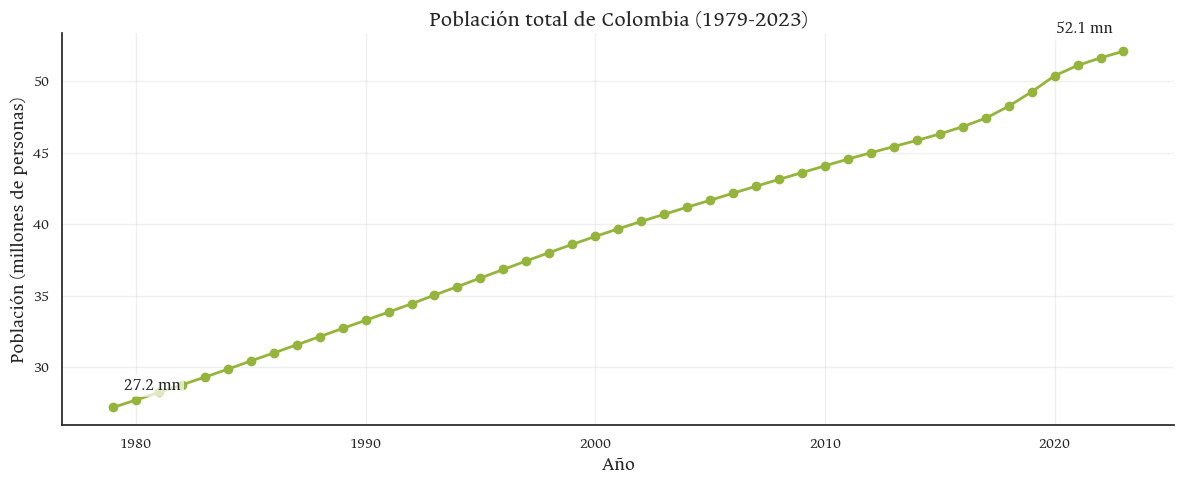

In [21]:
# Serie de población

color = get_palette(1)[0]

# Agregar solo por año
poblac_per = poblac.groupby(
    ['ano'], as_index = True)[
        'poblac_mn',
    ].sum().reset_index()

plt.figure(figsize=(12,5))
plt.plot(
    poblac_per['ano'], poblac_per['poblac_mn'],
    marker='o', color=color, linewidth=2,
)
plt.title(
    'Población total de Colombia (1979-2023)',
    fontsize=16,
    # fontweight='bold',
)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Población (millones de personas)', fontsize=14)
# Mostrar solo marco inferior e izquierdo
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(
    '../figuras/descriptivo/descr_poblacion_ano.png',
    dpi=300,
    bbox_inches='tight',
)
# Agregar etiquetas al primer y último punto con desplazamiento usando annotate
x0 = poblac_per['ano'].iloc[0]
y0 = poblac_per['poblac_mn'].iloc[0]
xf = poblac_per['ano'].iloc[-1]
yf = poblac_per['poblac_mn'].iloc[-1]

# Primer punto: etiqueta a la DERECHA (arriba)
plt.annotate(
    f"{y0:.1f} mn",
    xy=(x0, y0),
    xytext=(8, 10),          # derecha y un poco arriba
    textcoords='offset points',
    ha='left', va='bottom',
    fontsize=12,
    bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.7),
    clip_on=False,
)
# Último punto: etiqueta a la IZQUIERDA (arriba)
plt.annotate(
    f"{yf:.1f} mn",
    xy=(xf, yf),
    xytext=(-8, 10),         # izquierda y arriba
    textcoords='offset points',
    ha='right', va='bottom',
    fontsize=12,
    bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.7),
    clip_on=False,
)
plt.show()

## <span style = 'color: green'>***2.2.***</span> Estructura demográfica según el grupo etario

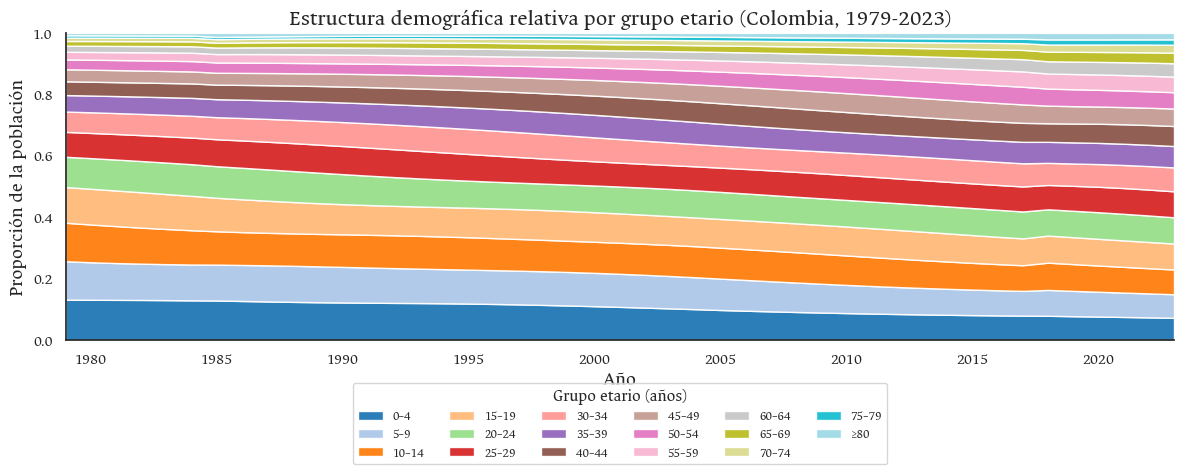

gr_et,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
ano,,,,,,,,,,,,,,,,,
1979,0.131403,0.124959,0.125354,0.116227,0.098683,0.080990,0.066314,0.053678,0.044895,0.039106,0.031988,0.024942,0.019920,0.015305,0.010843,0.007766,0.007628
1980,0.130969,0.122153,0.122946,0.116317,0.099816,0.082025,0.067310,0.054516,0.045037,0.039188,0.032458,0.025312,0.020051,0.015522,0.010794,0.007706,0.007880
1981,0.130697,0.119837,0.120252,0.115977,0.100827,0.083175,0.068222,0.055418,0.045309,0.039190,0.032862,0.025748,0.020219,0.015699,0.010815,0.007638,0.008115
1982,0.130384,0.118128,0.117384,0.115195,0.101668,0.084352,0.069146,0.056350,0.045743,0.039121,0.033216,0.026249,0.020408,0.015842,0.010937,0.007548,0.008330
1983,0.129813,0.117095,0.114476,0.113811,0.102484,0.085548,0.070090,0.057303,0.046329,0.039059,0.033501,0.026779,0.020642,0.015953,0.011175,0.007424,0.008520


In [22]:
df_pe = (
    poblac
    .groupby(['ano','gr_et'], as_index=False)['poblacion']
    .sum()
)


df_pe['total_ano'] = df_pe.groupby('ano')['poblacion'].transform('sum')
df_pe['prop'] = df_pe['poblacion'] / df_pe['total_ano']


mat_prop = df_pe.pivot(index='ano', columns='gr_et', values='prop').sort_index(axis=1)

for g in range(1,18):
    if g not in mat_prop.columns:
        mat_prop[g] = 0.0
mat_prop = mat_prop[sorted(mat_prop.columns)]

if 'etiquetas_gr' not in globals():
    etiquetas_gr = {
        1:"0–4", 2:"5–9", 3:"10–14", 4:"15–19", 5:"20–24", 6:"25–29",
        7:"30–34", 8:"35–39", 9:"40–44", 10:"45–49", 11:"50–54", 12:"55–59",
        13:"60–64", 14:"65–69", 15:"70–74", 16:"75–79", 17:"≥80",
    }
column_labels = [etiquetas_gr[g] for g in mat_prop.columns]

colores = get_palette(17)

plt.figure(figsize=(12,5))
plt.stackplot(
    mat_prop.index,
    *[mat_prop[c].values for c in mat_prop.columns],
    colors=colores,
    labels=column_labels,
    alpha=0.95,
)

plt.title('Estructura demográfica relativa por grupo etario (Colombia, 1979-2023)', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Proporción de la población', fontsize=14)
plt.ylim(0,1)
plt.xlim(mat_prop.index.min(), mat_prop.index.max())

plt.legend(
    title='Grupo etario (años)',
    loc='upper center',
    bbox_to_anchor=(0.5, -0.12),
    ncol=6,
    fontsize=9,
)

a = plt.gca()
a.spines['top'].set_visible(False)
a.spines['right'].set_visible(False)
plt.grid(True, axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()

plt.savefig(
    '../figuras/descriptivo/descr_poblacion_estructura_gret.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()

mat_prop.head()

## <span style='color: green'>2.3.</span> Animación: evolución de la pirámide poblacional (cada 3 años)

La siguiente animación muestra la estructura demográfica relativa por grupos quinquenales de edad (17 grupos) para los años 1979, 1982, 1985, ..., hasta el último año disponible. Se construye una pirámide poblacional (sin desagregación por sexo, por lo que se usa una sola barra horizontal por grupo) donde el eje vertical representa los grupos etarios y el eje horizontal la proporción de la población total de ese año.

Notas:
- Se emplea la función `get_palette(17)` para mantener la consistencia cromática.
- Las proporciones se calculan respecto al total poblacional del año.
- El GIF se guarda en `figuras/descriptivo/anim_piramide_poblacion.gif`.


Animación guardada en: ../figuras/descriptivo/anim_piramide_poblacion.gif


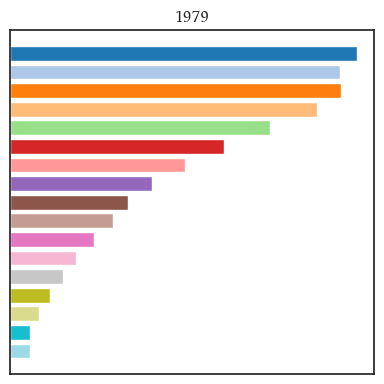

'../figuras/descriptivo/anim_piramide_poblacion.gif'

In [23]:
_cols_req = {'ano','gr_et','poblacion'}
if not _cols_req.issubset(poblac.columns):
    raise ValueError(f"Faltan columnas requeridas en 'poblac': {_cols_req - set(poblac.columns)}")

anos_orden = sorted(poblac['ano'].unique())
if len(anos_orden) == 0:
    raise ValueError("No hay años disponibles en 'poblac'.")
start_year = min(anos_orden)
anos_anim = [a for a in anos_orden if (a - start_year) % 3 == 0]

base = (
    poblac
    .groupby(['ano','gr_et'], as_index=False)['poblacion']
    .sum()
)

all_gr = list(range(1,18))
all_rows = (
    pd.MultiIndex.from_product([anos_orden, all_gr], names=['ano','gr_et'])
    .to_frame(index=False)
)
base = all_rows.merge(base, on=['ano','gr_et'], how='left').fillna({'poblacion':0})

if 'etiquetas_gr' not in globals():
    etiquetas_gr = {
        1:"0–4", 2:"5–9", 3:"10–14", 4:"15–19", 5:"20–24", 6:"25–29",
        7:"30–34", 8:"35–39", 9:"40–44", 10:"45–49", 11:"50–54", 12:"55–59",
        13:"60–64", 14:"65–69", 15:"70–74", 16:"75–79", 17:"≥80",
    }

base['total_ano'] = base.groupby('ano')['poblacion'].transform('sum')
base['prop'] = base['poblacion'] / base['total_ano'].where(base['total_ano']>0, 1)

palette17 = get_palette(17)

pivot_prop = base.pivot(index='gr_et', columns='ano', values='prop')

fig, ax = plt.subplots(figsize=(7,8))
plt.close(fig)

max_prop = pivot_prop.max().max() * 1.05

bar_container = None
anno_text = None

def init():
    ax.clear()
    ax.set_xlim(0, max_prop)
    ax.set_ylim(0.5, 17.5)
    ax.set_xlabel('Proporción del total anual')
    ax.set_ylabel('Grupo etario (años)')
    ax.set_title('Pirámide poblacional (estructura relativa)')
    ax.set_yticks(range(1,18))
    
    labels = [etiquetas_gr[g] for g in range(17,0,-1)]
    ax.set_yticklabels(labels)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True, axis='x', alpha=0.3, linestyle='--')
    return []

def animate(i):
    year = anos_anim[i]
    ax.clear()

    ax.set_xlim(0, max_prop)
    ax.set_ylim(0.5, 17.5)
    ax.set_xlabel('Proporción del total anual')
    ax.set_ylabel('Grupo etario (años)')
    ax.set_title(f'Estructura demográfica relativa - {year}')
    ax.set_yticks(range(1,18))

    labels = [etiquetas_gr[g] for g in range(17,0,-1)]
    ax.set_yticklabels(labels)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True, axis='x', alpha=0.3, linestyle='--')

    vals = pivot_prop[year].reindex(range(1,18)).values  
    vals_inv = vals[::-1]  

    
    cols_inv = palette17[::-1]

    
    ax.barh(range(1,18), vals_inv, color=cols_inv, edgecolor='white')

    for y_pos, v in zip(range(1,18), vals_inv):
        if v > 0.01:  # >1%
            ax.text(v + max_prop*0.005, y_pos, f"{v*100:.1f}%", va='center', fontsize=8)

    return []

anim = animation.FuncAnimation(
    fig, animate, init_func=init, frames=len(anos_anim), interval=900, blit=False
)

output_dir = '../figuras/descriptivo'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'anim_piramide_poblacion.gif')

try:
    from matplotlib.animation import PillowWriter
    writer = PillowWriter(fps=1)
    anim.save(output_path, writer=writer)
    print(f"Animación guardada en: {output_path}")
except Exception as e:
    print("No se pudo guardar el GIF. Instala pillow si falta: pip install pillow")
    print("Error:", e)

init()
animate(0)
from IPython.display import display
fig_thumbnail, ax_thumb = plt.subplots(figsize=(4,4))
ax_thumb.barh(range(1,18), pivot_prop[anos_anim[0]].reindex(range(1,18)).values[::-1], color=palette17[::-1])
ax_thumb.set_yticks([]); ax_thumb.set_xticks([])
ax_thumb.set_title(f"{anos_anim[0]}")
plt.tight_layout()
plt.show()

output_path if os.path.exists(output_path) else 'GIF no generado'

## <span style='color: green'>2.4.</span> Índices de envejecimiento y dependencia

Se calculan los siguientes indicadores demográficos (sin desagregación por sexo):

- Índice de envejecimiento (IE): población de 60+ dividida por población de 0–14.
- Índice de dependencia total (IDT): (población 0–14 + población 60+) / población 15–59.
- Índice de dependencia juvenil (IDJ): población 0–14 / población 15–59.
- Índice de dependencia de la vejez (IDV): población 60+ / población 15–59.

Definiciones de rangos usados (en términos de `gr_et`):
- 0–14: grupos 1,2,3.
- 15–59: grupos 4 a 12.
- 60+: grupos 13 a 17.

Las series permiten observar la transición demográfica y el aumento relativo del peso de la población mayor. La figura resultante se guarda en `figuras/descriptivo/indices_envejecimiento_dependencia.png`.


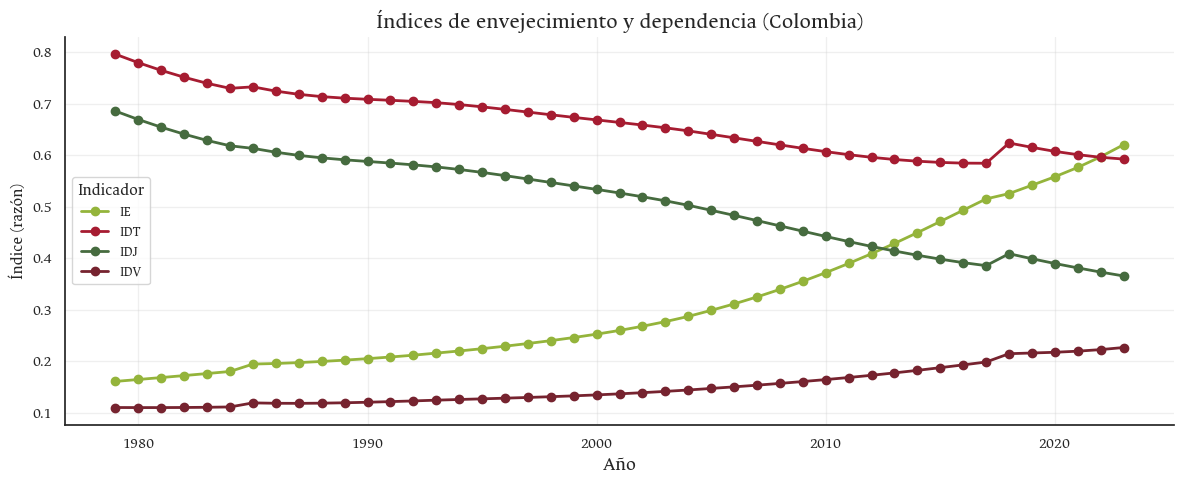

,ano,IE,IDT,IDJ,IDV
0,1979,0.161014,0.795904,0.685524,0.110379
1,1980,0.164741,0.779429,0.669186,0.110243
2,1981,0.168522,0.764514,0.654258,0.110257
3,1982,0.172358,0.751195,0.640756,0.110440
4,1983,0.176306,0.739424,0.628598,0.110826


In [24]:
# Cálculo y gráfico de índices de envejecimiento y dependencia
# Requiere DataFrame `poblac` con columnas: ano, gr_et, poblacion

# 1. Validar columnas
req_cols = {'ano','gr_et','poblacion'}
if not req_cols.issubset(poblac.columns):
    raise ValueError(f"Faltan columnas en 'poblac': {req_cols - set(poblac.columns)}")

# 2. Agregar población por año y grupo (por seguridad)
agg = (poblac.groupby(['ano','gr_et'], as_index=False)['poblacion'].sum())

# 3. Definir conjuntos de grupos
grupo_014 = [1,2,3]
grupo_1559 = list(range(4,13))  # 4..12
grupo_60p = [13,14,15,16,17]

# 4. Pivot para comodidad (años x gr_et)
mat = agg.pivot(index='ano', columns='gr_et', values='poblacion').fillna(0)

# 5. Sumas por rangos
p_014 = mat[grupo_014].sum(axis=1)
p_1559 = mat[grupo_1559].sum(axis=1)
p_60p = mat[grupo_60p].sum(axis=1)

def safe_div(num, den):
    return num/den.replace(0, pd.NA) if hasattr(den, 'replace') else (num/den if den!=0 else pd.NA)

# 6. Índices
IE  = safe_div(p_60p, p_014)          # Índice de envejecimiento
IDJ = safe_div(p_014, p_1559)         # Dependencia juvenil
IDV = safe_div(p_60p, p_1559)         # Dependencia vejez
IDT = safe_div(p_014 + p_60p, p_1559) # Dependencia total

indices_df = pd.DataFrame({
    'ano': mat.index,
    'IE': IE,
    'IDT': IDT,
    'IDJ': IDJ,
    'IDV': IDV,
}).reset_index(drop=True)

# 7. Gráfico
cols_plot = ['IE','IDT','IDJ','IDV']
colores = get_palette(len(cols_plot))

plt.figure(figsize=(12,5))
for c, col in zip(colores, cols_plot):
    plt.plot(indices_df['ano'], indices_df[col], marker='o', linewidth=2, color=c, label=col)

plt.title('Índices de envejecimiento y dependencia (Colombia)', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Índice (razón)')
plt.legend(fontsize=10, title='Indicador')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Guardar figura
import os
os.makedirs('../figuras/descriptivo', exist_ok=True)
plt.savefig('../figuras/descriptivo/indices_envejecimiento_dependencia.png', dpi=300, bbox_inches='tight')
plt.show()

# 8. Mostrar primeras filas
indices_df.head()

In [25]:
#
# Guardar la tabla de indices a CSV

indices_df.to_csv('../figuras/descriptivo/indices_envejecimiento_dependencia.csv', index=False)

## <span style='color: green'>2.5.</span> Porcentaje población ≥60 y razón de dependencia total

En este gráfico se muestra simultáneamente:

- Eje izquierdo (línea sólida): porcentaje de la población de 60 años y más (grupos 13–17) respecto al total anual.
- Eje derecho (línea discontinua): razón de dependencia total = (Población 0–14 + Población ≥60) / Población 15–59.

Esto permite visualizar cómo el envejecimiento (creciente peso relativo de mayores) se relaciona con la carga demográfica sobre la población potencialmente activa (15–59). La figura se guarda como `figuras/descriptivo/porcentaje_60_mas_y_dependencia_total.png`.


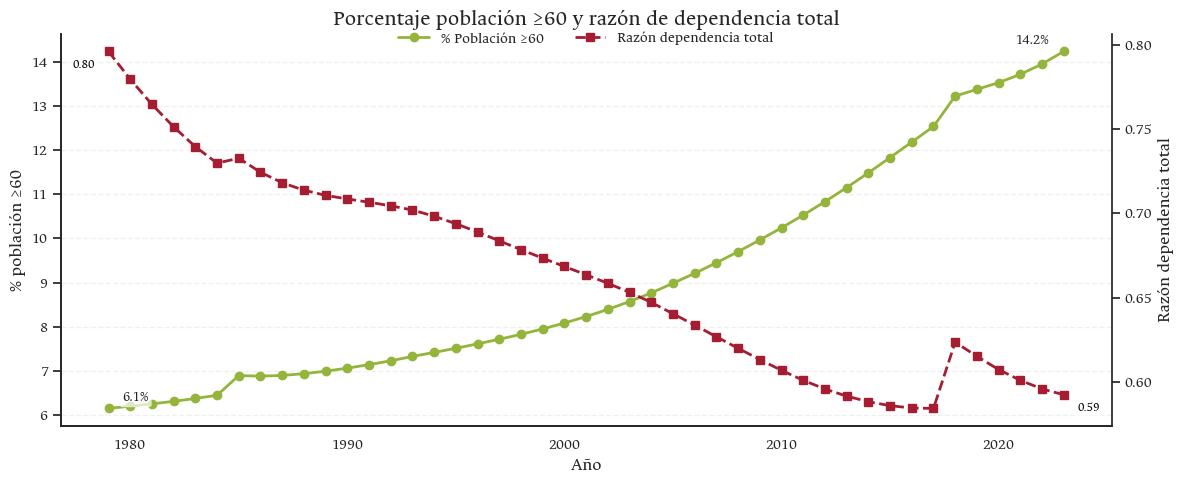

,ano,pct_poblacion_60_mas,razon_dependencia_total
0,1979,6.146171,0.795904
1,1980,6.195391,0.779429
2,1981,6.248548,0.764514
3,1982,6.306522,0.751195
4,1983,6.371397,0.739424


In [26]:
# Gráfico dual: % población 60+ (eje izquierdo) y razón de dependencia total (eje derecho)
# Reutiliza DataFrame 'poblac' y, si existe, 'indices_df'; si no, recalcula lo necesario.

import os

def _validar_cols(df, cols):
    falt = set(cols) - set(df.columns)
    if falt:
        raise ValueError(f"Faltan columnas en 'poblac': {falt}")
_validar_cols(poblac, ['ano','gr_et','poblacion'])

df_pop = poblac.groupby(['ano','gr_et'], as_index=False)['poblacion'].sum()

gr_014 = [1,2,3]
gr_1559 = list(range(4,13))
gr_60p = [13,14,15,16,17]

pivot_pop = df_pop.pivot(index='ano', columns='gr_et', values='poblacion').fillna(0)

P014 = pivot_pop[gr_014].sum(axis=1)
P1559 = pivot_pop[gr_1559].sum(axis=1)
P60 = pivot_pop[gr_60p].sum(axis=1)
PTOT = P014 + P1559 + P60

pct_60 = (P60 / PTOT) * 100
raz_dep_total = (P014 + P60) / P1559.replace(0, pd.NA)

serie_anos = pct_60.index.values

col_lineas = get_palette(2)
color_pct60, color_dep = col_lineas

fig, ax1 = plt.subplots(figsize=(12,5))
ax2 = ax1.twinx()

ax1.plot(serie_anos, pct_60, color=color_pct60, marker='o', linewidth=2, label='% Población ≥60')
ax1.set_ylabel('% población ≥60', fontsize=13)
ax1.set_xlabel('Año', fontsize=13)

ax2.plot(serie_anos, raz_dep_total, color=color_dep, marker='s', linewidth=2, linestyle='--', label='Razón dependencia total')
ax2.set_ylabel('Razón dependencia total', fontsize=13)

title_txt = 'Porcentaje población ≥60 y razón de dependencia total'
ax1.set_title(title_txt, fontsize=16)

for spine in ['top']:
    ax1.spines[spine].set_visible(False)
    ax2.spines[spine].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.grid(True, axis='y', alpha=0.3, linestyle='--')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
leg = ax1.legend(lines_1 + lines_2, labels_1 + labels_2,
                 loc='upper center', bbox_to_anchor=(0.5, 0.04 + 1),
                 ncol=2, fontsize=11, frameon=False)

ax1.annotate(f"{pct_60.iloc[0]:.1f}%", xy=(serie_anos[0], pct_60.iloc[0]), xytext=(10,5), textcoords='offset points', fontsize=10,
             bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.7))
ax1.annotate(f"{pct_60.iloc[-1]:.1f}%", xy=(serie_anos[-1], pct_60.iloc[-1]), xytext=(-10,5), textcoords='offset points', fontsize=10,
             ha='right', bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.7))

ax2.annotate(f"{raz_dep_total.iloc[0]:.2f}", xy=(serie_anos[0], raz_dep_total.iloc[0]), xytext=(-10,-12),
             textcoords='offset points', fontsize=9, ha='right', color='black',
             bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.65))
ax2.annotate(f"{raz_dep_total.iloc[-1]:.2f}", xy=(serie_anos[-1], raz_dep_total.iloc[-1]), xytext=(10,-12),
             textcoords='offset points', fontsize=9, ha='left', color='black',
             bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.65))

out_path = '../figuras/descriptivo/porcentaje_60_mas_y_dependencia_total.png'
os.makedirs(os.path.dirname(out_path), exist_ok=True)
plt.tight_layout()
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.show()

res_dual = pd.DataFrame({
    'ano': serie_anos,
    'pct_poblacion_60_mas': pct_60.values,
    'razon_dependencia_total': raz_dep_total.values
})
res_dual.head()

In [27]:
# Agregrar la población por año
poblac_ano = poblac.groupby('ano', as_index=False)['poblacion'].sum()

In [28]:
poblac_ano.tail(10)

,ano,poblacion
35,2014,45866010
36,2015,46313898
37,2016,46830116
38,2017,47419200
39,2018,48258494
40,2019,49266526
41,2020,50390790
42,2021,51115637
43,2022,51643565
44,2023,52117067


# <span style = 'color: red'>***3.*** Análisis de la serie de la tasa de mortalidad anual

Analizadas las dos series anteriores, se procede a abordar el análisis sobre la serie de tiempo derivada sobre la tasa de mortalidad anual.


## <span style = 'color: green'>***3.1.***</span> Serie de tasa de mortalidad

In [29]:
#
# Lectura de los datos
mort = pd.read_csv(
    r'../data/processed/mortalidad/tasas_mortalidad_gret_per.csv',
)

print(
    f'La base contiene {mort.shape[0]} registros y {mort.shape[1]} columnas.'
)


La base contiene 765 registros y 7 columnas.


In [30]:
mort.dtypes

ano                     int64
t                       int64
gr_et                   int64
poblacion               int64
conteo_defunciones    float64
tasa_x100k            float64
tasa                  float64
dtype: object

In [31]:
mort_per = mort.groupby(
    ['ano', ], as_index=False
)[['poblacion', 'conteo_defunciones']].sum()
mort_per['tasa_x100k'] = (mort_per['conteo_defunciones'] / mort_per['poblacion']) * 1e5
mort_per.head()

,ano,poblacion,conteo_defunciones,tasa_x100k
0,1979,27165971,1738.0,6.397710
1,1980,27684385,1851.0,6.686080
2,1981,28212667,1952.0,6.918878
3,1982,28748586,1863.0,6.480319
4,1983,29289744,1799.0,6.142082


In [32]:
mort_per.tail()

,ano,poblacion,conteo_defunciones,tasa_x100k
40,2019,49266526,1164.0,2.362659
41,2020,50390790,1010.0,2.004335
42,2021,51115637,1187.0,2.322186
43,2022,51643565,1402.0,2.714762
44,2023,52117067,1568.0,3.008611


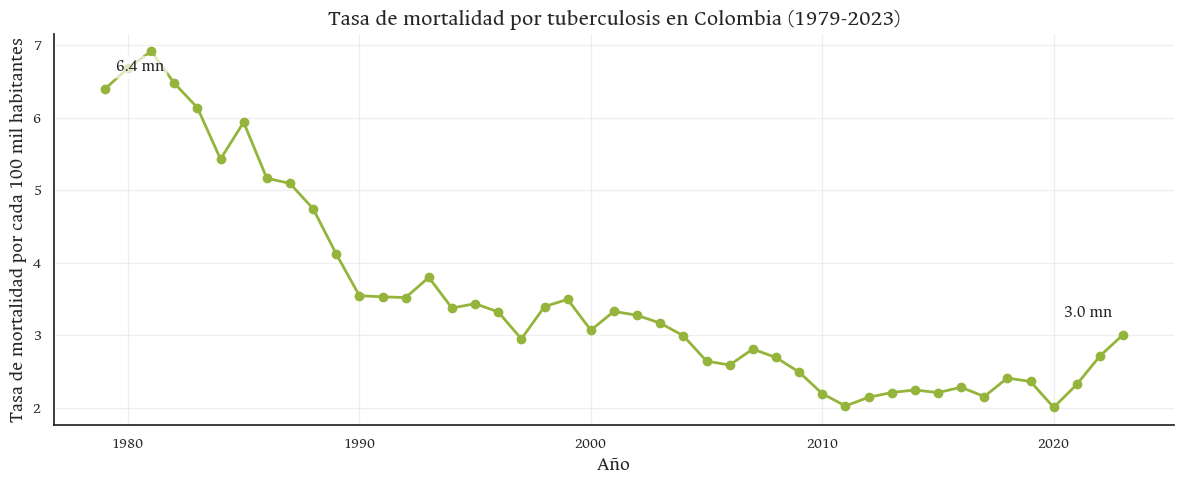

In [33]:
#
# Serie de población

color = get_palette(1)[0]

#
plt.figure(figsize=(12,5))
plt.plot(
    mort_per['ano'], mort_per['tasa_x100k'],
    marker='o', color=color, linewidth=2,
)
plt.title(
    'Tasa de mortalidad por tuberculosis en Colombia (1979-2023)',
    fontsize=16,
    # fontweight='bold',
)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Tasa de mortalidad por cada 100 mil habitantes', fontsize=14)
# Mostrar solo marco inferior e izquierdo
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(
    '../figuras/descriptivo/descr_mortalidad_ano.png',
    dpi=300,
    bbox_inches='tight',
)
# Agregar etiquetas al primer y último punto con desplazamiento usando annotate
x0 = mort_per['ano'].iloc[0]
y0 = mort_per['tasa_x100k'].iloc[0]
xf = mort_per['ano'].iloc[-1]
yf = mort_per['tasa_x100k'].iloc[-1]

# Primer punto: etiqueta a la DERECHA (arriba)
plt.annotate(
    f"{y0:.1f} mn",
    xy=(x0, y0),
    xytext=(8, 10),          # derecha y un poco arriba
    textcoords='offset points',
    ha='left', va='bottom',
    fontsize=12,
    bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.7),
    clip_on=False,
)
# Último punto: etiqueta a la IZQUIERDA (arriba)
plt.annotate(
    f"{yf:.1f} mn",
    xy=(xf, yf),
    xytext=(-8, 10),         # izquierda y arriba
    textcoords='offset points',
    ha='right', va='bottom',
    fontsize=12,
    bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.7),
    clip_on=False,
)
plt.show()

## <span style = 'color: green'>***3.2.***</span> Serie de tasa de mortalidad por grupo etario

In [34]:
#mort = mort[['ano', 'gr_et', 't', 'tasa_x100k']].copy()

In [35]:
pd.concat(
    [mort.head(3), mort.tail(3), ],
    axis=0,
)

,ano,t,gr_et,poblacion,conteo_defunciones,tasa_x100k,tasa
0,1979,1,1,3569687,175.0,4.902391,0.000049
1,1979,1,2,3394629,41.0,1.207790,0.000012
2,1979,1,3,3405357,31.0,0.910330,0.000009
762,2023,45,15,1342156,174.0,12.964216,0.000130
763,2023,45,16,914415,143.0,15.638414,0.000156
764,2023,45,17,1092994,244.0,22.324002,0.000223


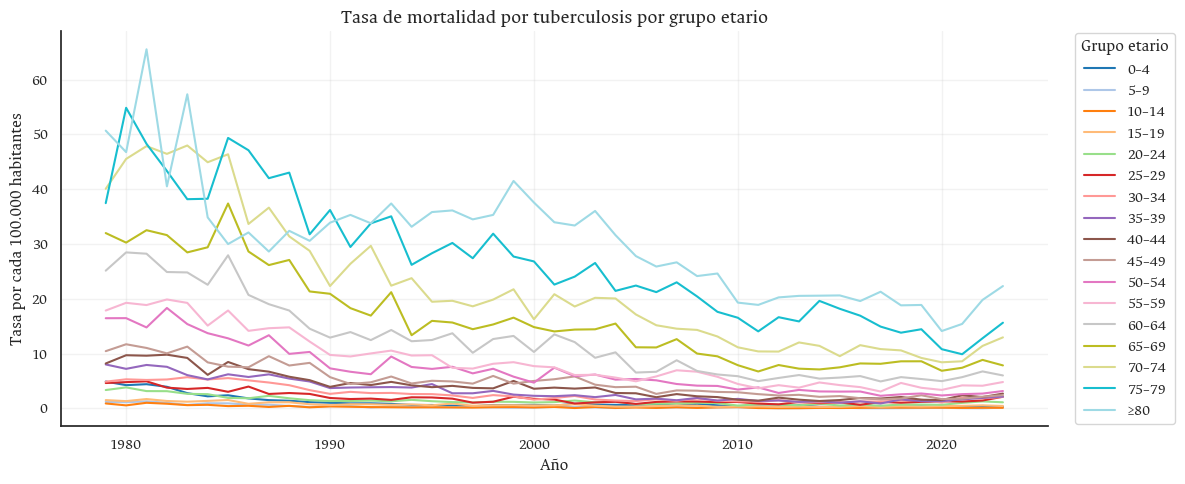

In [36]:
# Serie de tiempo por grupo etario (gr_et)
# Usamos `etiquetas_gr` para etiquetas legibles

df = mort[['ano', 'gr_et', 'tasa_x100k']].copy()
df['grupo_etario'] = df['gr_et'].map(etiquetas_gr)
# Asegurar orden por grupo y año
df.sort_values(['gr_et', 'ano'], inplace=True)

# Obtener lista ordenada de grupos presentes
grupos = [g for g in sorted(df['gr_et'].dropna().unique())]
# Paleta dinámica (si existe get_palette, la usamos)
try:
    palette = get_palette(len(grupos))
except Exception:
    import matplotlib.pyplot as _plt
    palette = _plt.cm.tab20.colors

plt.figure(figsize=(12,5))
for i, g in enumerate(grupos):
    sub = df[df['gr_et'] == g]
    if sub.empty:
        continue
    label = etiquetas_gr.get(g, str(g))
    color = palette[i % len(palette)]
    plt.plot(sub['ano'], sub['tasa_x100k'], label=label, color=color, linewidth=1.5)

plt.title('Tasa de mortalidad por tuberculosis por grupo etario', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Tasa por cada 100.000 habitantes', fontsize=12)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(alpha=0.25)
# Leyenda fuera del plot si hay muchas series
leg = plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))
# Añadir título a la leyenda
if leg is not None:
    leg.set_title('Grupo etario')
plt.tight_layout()
# Guardar figura
plt.savefig('../figuras/descriptivo/descr_mortalidad_por_gr_et.png', dpi=300, bbox_inches='tight')
plt.show()

## <span style = 'color: green'>***3.3.***</span> Mapa de calor

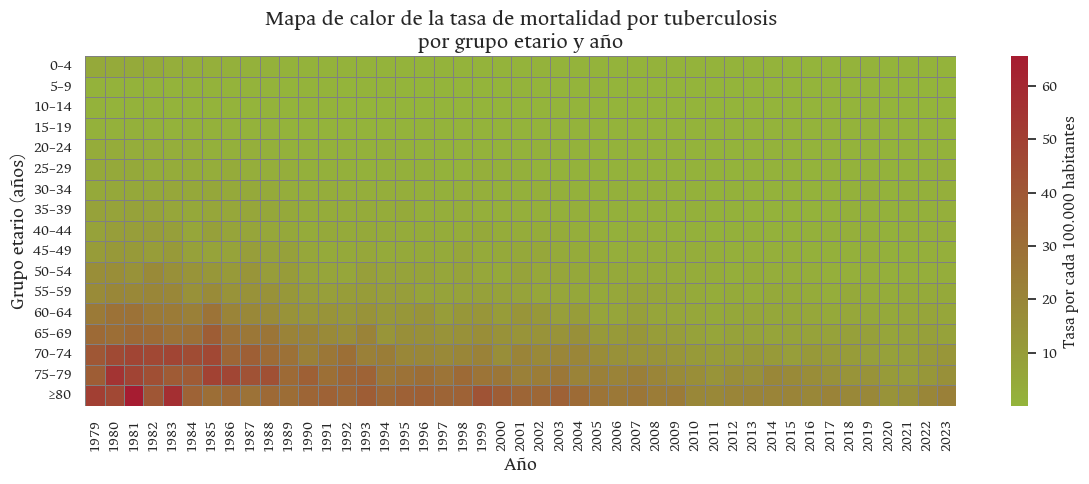

In [37]:
# Mapa de calor: tasa de mortalidad por grupo etario (gr_et) y año
from matplotlib.colors import LinearSegmentedColormap

# Construir matriz gr_et x ano de tasas (tasa_x100k)
mat = None
if set(['gr_et','ano','tasa_x100k']).issubset(mort.columns):
    mat = mort.pivot(index='gr_et', columns='ano', values='tasa_x100k')
    # Asegurar orden por gr_et y columnas por año
    mat = mat.sort_index().reindex(sorted(mat.columns), axis=1)

if mat is None or mat.empty:
    print('No hay datos suficientes en `mort` para construir el mapa de calor (revisar columnas gr_et/ano/tasa_x100k).')
else:
    # Preparar colormap similar al usado para defunciones
    try:
        color = get_palette(2)
        cmap = LinearSegmentedColormap.from_list('mi_cmap', [color[0], color[1]])
    except Exception:
        import matplotlib.pyplot as _plt
        cmap = _plt.cm.viridis

    # Mapear etiquetas legibles para el eje y (gr_et)
    ylabels = [etiquetas_gr.get(int(g), str(g)) if (pd.notna(g)) else '' for g in mat.index]

    plt.figure(figsize=(12,5))
    sns.heatmap(
        mat,
        cmap=cmap,
        linewidths=0.5,
        linecolor='gray',
        cbar_kws={'label': 'Tasa por cada 100.000 habitantes'},
        yticklabels=ylabels,
    )
    plt.title(
        'Mapa de calor de la tasa de mortalidad por tuberculosis\npor grupo etario y año',
        fontsize=16,
    )
    plt.xlabel('Año', fontsize=14)
    plt.ylabel('Grupo etario (años)', fontsize=14)
    plt.tight_layout()
    plt.savefig('../figuras/descriptivo/descr_mortalidad_heatmap_ano_gret.png', dpi=300, bbox_inches='tight')
    plt.show()

## <span style = 'color: green'>***3.4.***</span> Mapa de calor

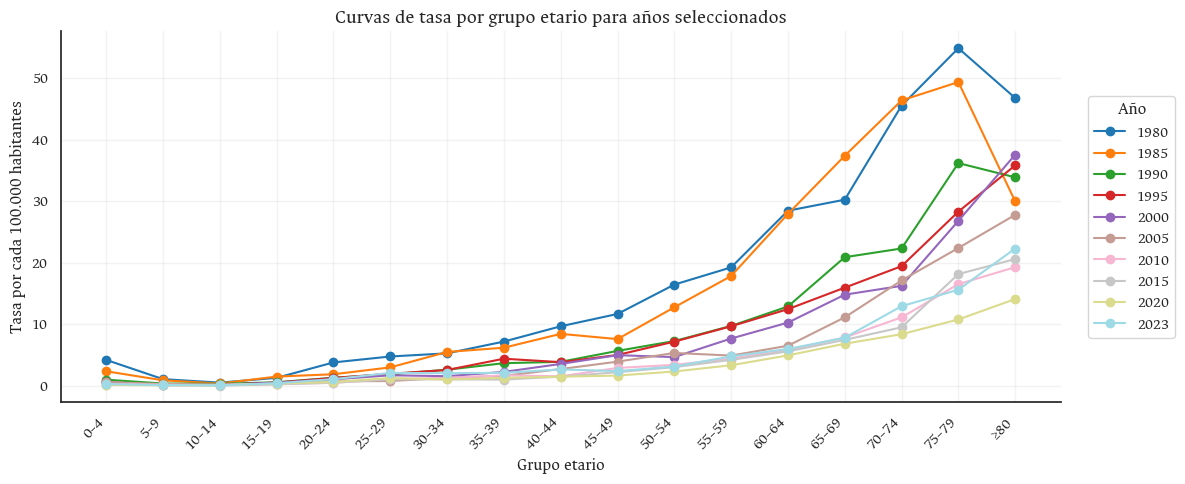

In [38]:
# Curvas de tasa de mortalidad por grupo etario para años seleccionados

years_all = sorted(mort['ano'].dropna().unique())
# Construir la lista: 1980,1985,...,2020 y 2023 (si están presentes)
years_sel = [y for y in years_all if (y % 5 == 0 and y % 10 == 0)]  # años en 0

years_sel += [y for y in years_all if (y % 10 == 5)]
years_sel = sorted(set(years_sel))
# Asegurar incluir 2023 si no está ya
if 2023 in years_all and 2023 not in years_sel:
    years_sel.append(2023)
# Limitar a 10 curvas (esperado n=10)
years_sel = sorted(years_sel)[:10]
n = len(years_sel)
# Obtener paleta de n colores y usar un color distinto por año
try:
    colores_years = get_palette(n)
    # si la paleta devuelve menos colores, repetirla lo suficiente
    if len(colores_years) < n:
        import itertools
        colores_years = list(itertools.islice(itertools.cycle(colores_years), n))
except Exception:
    import matplotlib.pyplot as _plt
    colores_years = list(_plt.cm.tab10.colors)[:n]

# Preparar datos: pivot gr_et x ano
mat = mort.pivot(index='gr_et', columns='ano', values='tasa_x100k')
mat = mat.sort_index()
# Etiquetas legibles para los ticks del eje x
xlabels = [etiquetas_gr.get(int(g), str(g)) if pd.notna(g) else '' for g in mat.index]
x = list(range(len(mat.index)))

plt.figure(figsize=(12,5))
for i, yr in enumerate(years_sel):
    if yr not in mat.columns:
        continue
    y = mat[yr].values
    col = colores_years[i % len(colores_years)]
    plt.plot(x, y, marker='o', color=col, linewidth=1.5, label=str(yr))

plt.xticks(ticks=x, labels=xlabels, rotation=45, ha='right')
plt.xlabel('Grupo etario', fontsize=12)
plt.ylabel('Tasa por cada 100.000 habitantes', fontsize=12)
plt.title('Curvas de tasa por grupo etario para años seleccionados', fontsize=14)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(alpha=0.25)
leg = plt.legend(title='Año', loc='center left', bbox_to_anchor=(1.02, 0.5))
plt.tight_layout()
plt.savefig('../figuras/descriptivo/descr_curvas_tasa_por_gret.png', dpi=300, bbox_inches='tight')
plt.show()
